In [1]:
# Importando o pandas
import pandas as pd

In [11]:
# importando base de dados .xlsx
dbase = pd.read_excel('engajamento-Instagram.xlsx')
dbase.info()
dbase.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Tipo           52 non-null     object        
 1   Data           52 non-null     datetime64[ns]
 2   Curtidas       52 non-null     int64         
 3   Comentários    52 non-null     int64         
 4   Visualizações  15 non-null     float64       
 5   Tags           44 non-null     object        
 6   Pessoas        52 non-null     object        
 7   Campanhas      52 non-null     object        
 8   Carrossel      8 non-null      object        
 9   Interacoes     52 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 4.2+ KB


,Tipo,Data,Curtidas,Comentários,Visualizações,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,NaN,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,NaN,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,NaN,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,82878.0,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,NaN,Produtos,S,N,NaN,4437


In [12]:
# Após uma breve analise da base de dados concluisse que a coluna 'visualizações' possue valores nulos e também não será de muita utilidade para o projeto.
# por ser uma base de dados pequena o melhor a se fazer é exclui-la do que trata-la e normaliza-la. Nota-se também outras colunas com valores nulos.

dbase = dbase.drop("Visualizações", axis=1)
dbase.head(3)
#apagando coluna 'Visualizações'



,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,NaN,2816


In [13]:
# Contando valores presentes na coluna 'Carrossel'
dbase.Carrossel.value_counts()

Carrossel
S    8
Name: count, dtype: int64

In [14]:
# Valores nulos nesta coluna 'Carrossel' significa que não são postagens do tipo Carrossel, portanto deveriam está preenchida como 'N'
dbase.loc[dbase.Carrossel.isnull()].head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,NaN,4437


In [15]:
# Selecionando apenas a coluna 'Carrossel' e atribuindo o valor 'N' onde tem valores nulos
dbase.loc[dbase.Carrossel.isnull(), "Carrossel"] = "N"
dbase.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,N,4437


In [17]:
# descrição estatistica da base de dados
dbase.describe()

,Data,Curtidas,Comentários,Interacoes
count,52,52.000000,52.000000,52.000000
mean,2021-12-23 04:36:55.384615424,12262.730769,189.500000,12452.230769
min,2021-09-11 00:00:00,2807.000000,9.000000,2816.000000
25%,2021-10-23 06:00:00,5492.000000,69.500000,5562.500000
50%,2022-01-05 00:00:00,9603.000000,128.000000,9773.500000
75%,2022-02-15 12:00:00,17621.750000,265.250000,17920.750000
max,2022-03-27 00:00:00,37351.000000,852.000000,37853.000000
std,NaN,8165.875326,170.687709,8299.390088


<Axes: xlabel='Data', ylabel='Curtidas'>

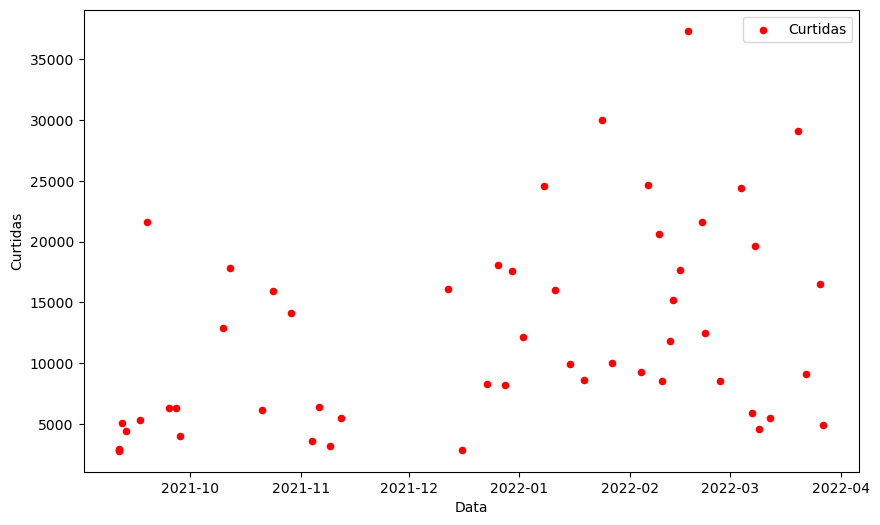

In [26]:
# Visualização em gráfico de dispersão para tentar entender melhor
dbase.plot(kind="scatter", x="Data", y="Curtidas", color="red",label="Curtidas", figsize=(10,6) )

<Axes: xlabel='Data', ylabel='Comentários'>

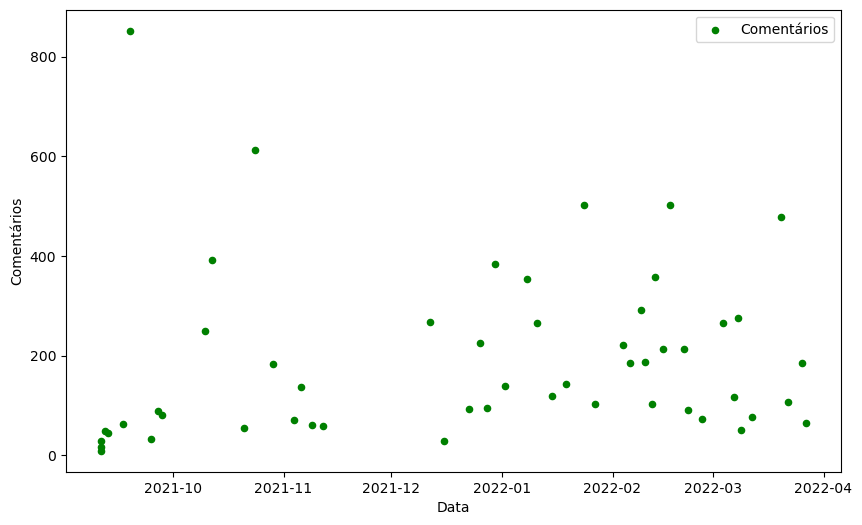

In [25]:
dbase.plot(kind="scatter", x="Data", y="Comentários", color="green",label="Comentários",figsize=(10,6) )

In [29]:
# os gráficos e informações estatisticas não esclarece basicamente nada pois existe uma grande dispersão entre curtidas e comentários em relação a data. Não seria uma relação direta então o decorrer do tempo e obtenção de novos seguidores com o aumento de curtidas e comentários.
# Precisamos analisar outras colunas da base de dados para encontrar um padrão
dbase.sort_values(by="Curtidas", ascending=False).head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
39,Foto,2022-02-17,37351,502,Promoções,S,S,N,37853
30,Reels,2022-01-24,29981,502,Trends,S,S,N,30483
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,N,29563
33,Foto,2022-02-06,24655,186,Influenciadores,S,S,N,24841
26,Foto,2022-01-08,24585,354,Datas comemorativas,S,S,S,24939


In [30]:
dbase.sort_values(by="Curtidas", ascending=True).head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
20,Foto,2021-12-16,2881,29,Produtos,N,N,N,2910
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
17,Vídeo,2021-11-09,3213,60,Produtos,N,N,N,3273


In [70]:
# Fazendo analise das 5 melhores e piores postagens encontra-se um padrão, a top 5 melhores postagens tinham pessoas e eram campanhas enquanto as 5 piores era completamente o contrario
dbase.groupby(["Tipo","Pessoas"])[["Curtidas", "Comentários"]].mean()
# Nesse caso parece que videos e IGTV são estratégias ruins que devem ser evitadas.

Curtidas  Comentários
Tipo  Pessoas                           
Foto  N         3863.500000        29.50
      S        15236.666667       226.20
IGTV  S         6833.400000       133.60
Reels N         5934.500000        98.00
      S        20832.000000       342.00
Vídeo N         4007.500000        65.25
      S        16409.500000       370.00

In [80]:
dbase.groupby(["Tipo","Pessoas","Campanhas"])[["Curtidas", "Comentários"]].mean()
# Agrupando 'Tipo'+'Pessoas'+'Campanhas' notamos que os números de curtidas e comentários(engajamento) em alguns casos dobra. provando o ponto que campanhas com pessoas engajam muito mais.
# Notamos também que videos que possuem pessoas e são campanhas tem uma boa média comparado aos vídeos que não tem.

Curtidas  Comentários
Tipo  Pessoas Campanhas                           
Foto  N       N           2869.000000    20.500000
              S           5852.500000    47.500000
      S       N          10815.285714   159.928571
              S          19105.375000   284.187500
IGTV  S       N           6833.400000   133.600000
Reels N       N           5934.500000    98.000000
      S       N          12894.000000   249.000000
              S          24801.000000   388.500000
Vídeo N       N           4007.500000    65.250000
      S       S          16409.500000   370.000000

# Conclusões primarias
- Em uma análise incial, notamos que postagens que possuem pessoas engajam muito mais que aquelas que não possuem.
- O mesmo para postagens que são campanhas.
- Fotos e Reels que tem pessoas e são campanhas possuem as melhores médias de engajamento.
- Vídeos que possuem pessoas e são campanhas tem uma boa média em relação aqueles que não.

In [83]:
# Trabalhando com a coluna 'Tags'
dbase.groupby("Tags")[["Curtidas","Comentários"]].mean()
# Nota-se que existes Tags "dupla" que se repetem em tags isoladas

,Curtidas,Comentários
Tags,,
Datas comemorativas,17975.000000,298.333333
Datas comemorativas/Promoções,29084.000000,479.000000
Dicas de como usar/Novos Produtos,5703.500000,96.500000
Dicas de como usar/Produtos,7586.666667,158.333333
Influenciadores,15197.285714,161.714286
Loja,2832.500000,12.500000
Loja/Produtos,2930.000000,28.000000
Novos Produtos,11619.571429,227.714286
Produtos,5666.916667,70.666667


In [84]:
# Transformando a coluna 'Tags' em uma lista de tags
dbase.Tags = dbase.Tags.str.split("/")
dbase.head()


,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,[Loja],N,N,N,2874
1,Foto,2021-09-11,2930,28,"[Loja, Produtos]",N,N,N,2958
2,Foto,2021-09-11,2807,9,[Loja],N,N,N,2816
3,Vídeo,2021-09-12,5115,49,[Produtos],N,N,N,5164
4,Foto,2021-09-13,4392,45,[Produtos],S,N,N,4437


In [85]:
# Separando a coluna 'tag' em 1 linha para cada elemento da lista
dbase = dbase.explode('Tags')
dbase.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
1,Foto,2021-09-11,2930,28,Loja,N,N,N,2958
1,Foto,2021-09-11,2930,28,Produtos,N,N,N,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164


In [87]:
dbase.groupby("Tags")["Curtidas"].mean()

Tags
Datas comemorativas    20752.250000
Dicas de como usar      6833.400000
Influenciadores        15197.285714
Loja                    2865.000000
Novos Produtos         10304.888889
Produtos                6269.823529
Promoções              27458.333333
Trends                 20024.000000
Name: Curtidas, dtype: float64

In [89]:
# Ordenando por curtidas
dbase.groupby("Tags")[["Curtidas","Comentários"]].mean().sort_values('Curtidas', ascending=False)

,Curtidas,Comentários
Tags,,
Promoções,27458.333333,531.000000
Datas comemorativas,20752.250000,343.500000
Trends,20024.000000,352.250000
Influenciadores,15197.285714,161.714286
Novos Produtos,10304.888889,198.555556
Dicas de como usar,6833.400000,133.600000
Produtos,6269.823529,94.117647
Loja,2865.000000,17.666667


In [90]:
dbase[dbase.Tags.isnull()]

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
11,Foto,2021-10-12,17831,391,NaN,S,S,N,18222
19,Foto,2021-12-12,16086,268,NaN,S,S,N,16354
29,Foto,2022-01-19,8612,142,NaN,S,N,N,8754
38,Foto,2022-02-15,17687,213,NaN,S,N,N,17900
41,Foto,2022-02-22,12530,90,NaN,S,N,N,12620
43,Foto,2022-03-04,24399,266,NaN,S,S,N,24665
49,Foto,2022-03-22,9087,106,NaN,S,S,N,9193
50,Foto,2022-03-26,16551,186,NaN,S,N,N,16737


In [92]:
# Atribuindo o texto 'sem tag' para as linhas que possuem tag = nulo
dbase.loc[dbase.Tags.isnull(),"Tags"] = "Sem tag"

In [93]:
# Verificando novamente 
dbase.groupby("Tags")[["Curtidas","Comentários"]].mean().sort_values('Curtidas', ascending=False)

,Curtidas,Comentários
Tags,,
Promoções,27458.333333,531.000000
Datas comemorativas,20752.250000,343.500000
Trends,20024.000000,352.250000
Sem tag,15347.875000,207.750000
Influenciadores,15197.285714,161.714286
Novos Produtos,10304.888889,198.555556
Dicas de como usar,6833.400000,133.600000
Produtos,6269.823529,94.117647
Loja,2865.000000,17.666667


In [94]:
# Verificando a relação das 'tags' quando possui pessoas
dbase.groupby(["Pessoas","Tags"])[["Curtidas","Comentários"]].mean().sort_values('Curtidas', ascending=False)

Curtidas  Comentários
Pessoas Tags                                          
S       Promoções            27458.333333   531.000000
        Datas comemorativas  20752.250000   343.500000
        Trends               20024.000000   352.250000
        Sem tag              15347.875000   207.750000
        Influenciadores      15197.285714   161.714286
        Novos Produtos       10923.125000   215.625000
        Produtos              8316.375000   131.625000
        Dicas de como usar    6833.400000   133.600000
N       Novos Produtos        5359.000000    62.000000
        Produtos              4450.666667    60.777778
        Loja                  2865.000000    17.666667

In [95]:
# Verificando a relação das 'tags' quando é campanhas
dbase.groupby(["Campanhas","Tags"])[["Curtidas","Comentários"]].mean().sort_values('Curtidas', ascending=False)

Curtidas  Comentários
Campanhas Tags                                          
S         Promoções            33217.500000   490.500000
          Trends               22400.666667   386.666667
          Datas comemorativas  20752.250000   343.500000
          Influenciadores      18715.400000   197.600000
          Sem tag              16850.750000   257.750000
N         Promoções            15940.000000   612.000000
          Sem tag              13845.000000   157.750000
          Trends               12894.000000   249.000000
S         Novos Produtos       11040.666667   323.000000
N         Novos Produtos        9937.000000   136.333333
S         Produtos              9074.000000    67.500000
N         Dicas de como usar    6833.400000   133.600000
          Influenciadores       6402.000000    72.000000
          Produtos              5895.933333    97.666667
          Loja                  2865.000000    17.666667

# Conclusões 
- Ter pessoas é fundamental para um bom engajamento da publicação.
    -   Em todas as tags quando havia uma pessoa o resultadi foi muito melhor.
- Campanhas ajudam muito na divulgação da marca.
- A tag 'Promoção' teve um desempenho absurdamente maior que qualquer outra tag.
- Usar conteúdos que estão em trends ajuda bastande na divulgação da marca
- A tag 'Loja' teve um desempenho ruim mas não podemos afirmar isso categoricamente pois não foi testado esta tag em campanhas ou incluindo uma pessoa.
- Seria bom continuar a monitoração das postagens para encontrar outros padrões dado que a base de dados é pequena e possue poucas informações.